http://lampx.tugraz.at/~hadley/ss1/bloch/blochwave.php

In [1]:
from sympy import *
from IPython.display import display
init_printing()

Usando l'hamiltoniana
$$
    H = \frac{p^2}{2m} + V(x)
$$
con $V=-V_0 \Theta \left(\right|x - \lfloor x \rfloor \left| - \frac{l}{2} \right) $.
Ponendo $k=\sqrt{2m(\epsilon+V_0)}$ e $\alpha = \sqrt{-2m\epsilon}$ abbiamo che le soluzioni dell'equazione di schrodinger per $E \in \left[-V_0, 0\right]$ sono
$$
    \psi(x) = Ae^{i\frac{kx}{\hbar}} + Be^{-i\frac{kx}{\hbar}}
$$
dentro le buche e 
$$
    \psi(x) = Ae^{\frac{\alpha x}{\hbar}} + Be^{\frac{\alpha x}{\hbar}}
$$
fuori da esse.

In [2]:
m, V_0, l, hbar = symbols("m V_0 l hbar", real=True, positive=True)

#k = sqrt(2*m*(E + V_0))
#alpha = sqrt(-2*m*E)
k, alpha = symbols("k alpha", real=True, positive=True)

Ponendo $x=0$ su una discesa del potenziale, connettiamo la soluzione esponenziale con coefficienti $A$, $B$ a quella oscillante con coefficienti $C$, $D$
$$
    A+B=C+D \\
    \frac{\alpha}{\hbar}(A-B) = i\frac{k}{\hbar}(C-D)
$$
che implica
$$
    C = \frac{1}{2} \left((A+B) - i\frac{\alpha}{k}(A-B)\right) \\
    D = \frac{1}{2} \left((A+B) + i\frac{\alpha}{k}(A-B)\right)
$$

In [3]:
A, B = symbols("A B")

C = (A+B - I*alpha/k*(A-B))/2
D = (A+B + I*alpha/k*(A-B))/2
display(
    Eq(symbols("C"),C),
    Eq(symbols("D"),D)
)

Translando la funzione di $\frac{l}{2}$ affronto ora la risalita del potenziale:
$$
    Ce^{i\frac{kl}{2\hbar}}+De^{-i\frac{kl}{2\hbar}}=E+F \\
    i\frac{k}{\hbar}(Ce^{i\frac{kl}{2\hbar}}-De^{-i\frac{kl}{2\hbar}}) = \frac{\alpha}{\hbar}(E-F)
$$
che implica
$$
    E = \frac{1}{2} \left(Ce^{i\frac{kl}{2\hbar}}+De^{-i\frac{kl}{2\hbar}} + i\frac{k}{\alpha}(Ce^{i\frac{kl}{2\hbar}}-De^{-i\frac{kl}{2\hbar}})\right) \\
    F = \frac{1}{2} \left(Ce^{i\frac{kl}{2\hbar}}+De^{-i\frac{kl}{2\hbar}} - i\frac{k}{\alpha}(Ce^{i\frac{kl}{2\hbar}}-De^{-i\frac{kl}{2\hbar}})\right)
$$

In [4]:
cs = cos(k*l / (2 * hbar))
ss = sin(k*l / (2 * hbar))
# writing exponential as sin and cos
CDsum = C*(cs+I*ss) + D*(cs-I*ss)
CDdif = C*(cs+I*ss) - D*(cs-I*ss)
E = (CDsum + I*k/alpha * CDdif)/2
F = (CDsum - I*k/alpha * CDdif)/2
# collecting sins and coss
E = E.expand().collect((A,B)).collect((cs,ss))
F = F.expand().collect((A,B)).collect((cs,ss))
del CDsum, CDdif
display(
    Eq(symbols("E"),E),
    Eq(symbols("F"),F)
)

Con un'ultima translazione di $\frac{l}{2}$ arriviamo infine a esprimere l'operatore di translazione $T$:
$$
    \begin{bmatrix} A' \\ B' \end{bmatrix} = T \begin{bmatrix} A \\ B \end{bmatrix}
$$
con $A' = Ee^{\frac{\alpha l}{2 \hbar}}$ e $B' = Fe^{\frac{-\alpha l}{2 \hbar}}$ i corrispondenti di $A$ e $B$ della funzione translata di $l$. 

In [5]:
A_prime = (E*exp( alpha * l / (2*hbar))).rewrite(exp).expand(deep=False).collect((A,B))
B_prime = (F*exp(-alpha * l / (2*hbar))).rewrite(exp).expand(deep=False).collect((A,B))

T = Matrix(
    [[A_prime.coeff(A), A_prime.coeff(B)],
     [B_prime.coeff(A), B_prime.coeff(B)]]
)

display(T)

⎡⎛                ⎛ ⅈ⋅k⋅l    -ⅈ⋅k⋅l ⎞                    ⎞                    
⎢⎜                ⎜ ─────    ───────⎟    ⅈ⋅k⋅l    -ⅈ⋅k⋅l ⎟                    
⎢⎜    ⎛ α     k ⎞ ⎜  2⋅h̅      2⋅h̅ ⎟    ─────    ───────⎟  α⋅l               
⎢⎜  ⅈ⋅⎜─── - ───⎟⋅⎝ℯ      - ℯ       ⎠     2⋅h̅      2⋅h̅ ⎟  ───              -
⎢⎜    ⎝2⋅k   2⋅α⎠                       ℯ        ℯ       ⎟  2⋅h̅              
⎢⎜- ───────────────────────────────── + ────── + ────────⎟⋅ℯ                 ─
⎢⎝                  2                     2         2    ⎠                    
⎢                                                                             
⎢                         ⎛ ⅈ⋅k⋅l    -ⅈ⋅k⋅l ⎞  -α⋅l              ⎛            
⎢                         ⎜ ─────    ───────⎟  ─────             ⎜            
⎢             ⎛ α     k ⎞ ⎜  2⋅h̅      2⋅h̅ ⎟   2⋅h̅             ⎜    ⎛   α   
⎢          -ⅈ⋅⎜─── + ───⎟⋅⎝ℯ      - ℯ       ⎠⋅ℯ                  ⎜  ⅈ⋅⎜- ─── +
⎢             ⎝2⋅k   2⋅α⎠                           

Le bande di Bloch si formano quando $T$ ha degli autovalori di modulo 1. Per una matrice bidimensionale gli autovalori sono
$$
    \lambda_{\pm} = \frac{\mathrm{Tr}[T] \pm \sqrt{\mathrm{Tr}[T]^2 - 4 \det{T}}}{2}
$$

nel nostro caso $det{T} = 1$, grazie all'identità di Abel. Ci sono quindi due casi per gli autovalori:
$\left|\mathrm{Tr}[T]\right| > 2$, autovalori reali, e dato che $\det{T} = 1 = \lambda_{+} \lambda_{-}$ entrambi sono diversi da 1,
$\left|\mathrm{Tr}[T]\right| \le 2$, autovalori complessi, e
$$
    \bar{\lambda_{\pm}}\lambda_{\pm} = \frac{\mathrm{Tr}[T] \mp i \sqrt{4-\mathrm{Tr}[T]}}{2}\frac{\mathrm{Tr}[T] \pm i \sqrt{4-\mathrm{Tr}[T]}}{2}  = 1
$$
La condizione per le bande è quindi $\mathrm{Tr}[T] = \cos(\theta) \in [-1, 1]$

In [6]:
assert det(T).expand() == 1 #checking

T_trace = T.trace()

display(T_trace)

Tutti gli esponenziali sono funzione del parametro complesso adimensionale
$$
    \gamma = \frac{l}{2 \hbar} \left(\alpha + i k\right)
$$
e del suo coniugato. Esso gode inoltre della proprietà $|\gamma| = \frac{l}{2 \hbar} \sqrt{2mV_0}$

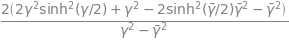

In [7]:
gamma = symbols("gamma")

gamma_trace = T_trace.subs(
    alpha, (hbar/l) *(gamma + conjugate(gamma))
).subs(
    k, (hbar/(I*l))*(gamma - conjugate(gamma))
)
gamma_trace = trigsimp(gamma_trace.rewrite(cos))
display(gamma_trace)

Armati ora di questa semplice espressione per $\cos(\theta)$ riscriviamola in termini dei parametri reali $\alpha$ e $k$

In [8]:
cos_theta = gamma_trace/2
cos_theta =cos_theta.subs(gamma, l/(2*hbar)*(alpha+I*k)).rewrite(exp).expand().rewrite(cos).expand()
cos_theta

Ottenendo infine la condizione
$$
    \left| \cos(\theta) \right| = \left| \left(\frac{\alpha}{2k} - \frac{k}{2\alpha}\right) \sin\left(\frac{kl}{2 \hbar}\right)\sinh\left(\frac{\alpha l}{2 \hbar}\right) + \cos\left(\frac{kl}{2 \hbar}\right)\cosh\left(\frac{\alpha l}{2 \hbar}\right) \right| \le 1
$$
Si può vedere come le bande sono centrate intorno al valore $\left(\frac{\alpha}{2k} - \frac{k}{2\alpha}\right) \tan\left(\frac{kl}{2 \hbar}\right)\tanh\left(\frac{\alpha l}{2 \hbar}\right) = -1$, facilmente riconoscibile come i livelli di buca singola.

Convertendola in cartesiane, usando $y =  \frac{l^2 m}{2 \hbar^2}\epsilon$ e $x = \frac{l^2 m}{2 \hbar^2}V_0$ si trova un diagramma che mostra come la bande si generino all'approfondirsi della buca (vedi https://www.desmos.com/calculator/rivuvcgyfu)

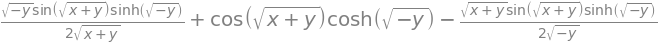

In [9]:
x,y = symbols("x y", real=True)
cos_theta_cart = cos_theta.subs(alpha, 2*hbar*sqrt(-y)/l).subs(k, 2*hbar*sqrt(x+y)/l)
cos_theta_cart

Scegliamo sul grafico un punto in cui vi è una singola banda, larga ma isolata. Prendiamo ad esempio $x=5$
Cerchiamo una soluzione numerica a $\cos(\theta) = 1$, sapendo che il fondamentale deve essere invariato sotto $T$.

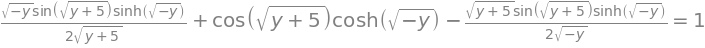

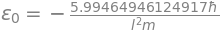

In [10]:
hole_size = 5

cos_theta_spec = cos_theta_cart.subs(x, hole_size)

display(Eq(cos_theta_spec, 1))
y_0 = nsolve(cos_theta_spec - 1, y, -hole_size*0.999)
display(Eq(symbols("epsilon_0"), 2*hbar/(l**2*m)*y_0))

Possiamo ora espandere $\cos(\theta)$ intorno a $y_0$:
$$
    \cos(\theta) = f(y) \implies 
    -\frac{\theta^2}{2} = \left. \frac{\partial f}{\partial y} \right|_{y=y_0}(y-y_0) \implies 
    y = y_0 - \frac{\theta^2}{2\left. \frac{\partial f}{\partial y} \right|_{y=y_0}}
$$
Sostituendo $\theta = \frac{p l}{\hbar}$ e $y =  \frac{l^2 m}{2 \hbar^2}V_0$ abbiamo alla fine
$$
    \epsilon = \epsilon_0 + \frac{p^2}{2 \left( -m \frac{1}{2} \left. \frac{\partial f}{\partial y} \right|_{y=y_0} \right) }
$$
che ci dà $m_{eff} = -m \frac{1}{2} \left. \frac{\partial f}{\partial y} \right|_{y=y_0}$

In [11]:
m_eff = -m/2 *cos_theta_spec.diff(y).subs(y, y_0)
m_eff

Si può infine disegnare un grafico che mostra come la massa effettiva aumenta ll'approfondirsi e/o allargarsi della buca

In [15]:
hole_sizes = [0.1 + i for i in range(50)]
cos_thetas = [cos_theta_cart.subs(x, size) for size in hole_sizes]
y_0s = [nsolve(cos_t - 1, y, -size*0.999) for cos_t, size in zip(cos_thetas, hole_sizes)]
m_effs_on_m = [-cos_t.diff(y).subs(y, y_0_val)/2 for cos_t, y_0_val in zip(cos_thetas, y_0s)]

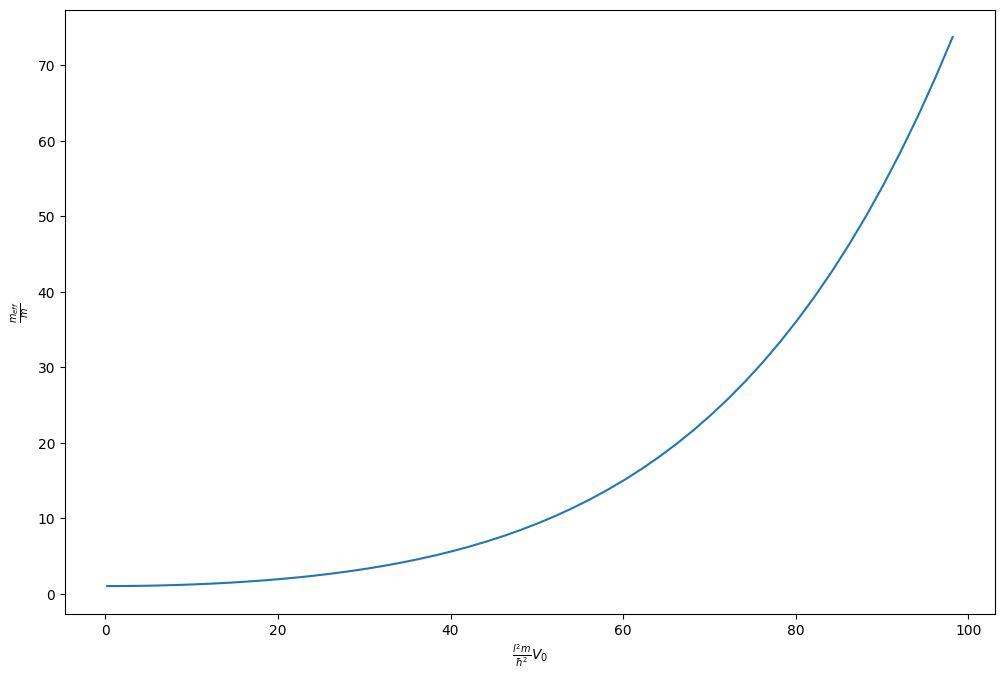

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y_graph = np.array(m_effs_on_m, dtype=float)
x_graph = np.array(hole_sizes, dtype=float) * 2

#y=np.log(y-1)
#x=np.log(x)

plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(x_graph, y_graph)
plt.ylabel("$\\frac{m_{eff}}{m}$")
plt.xlabel("$\\frac{l^2 m}{\\hbar^2}V_0$")
plt.show()

La curva è molto ben approssimata nel range calcolato da una quadratica, con coefficiente:

In [27]:
from scipy.optimize import curve_fit

def fit_func(x, qf):
    return qf*x**2 + 1

c_fit, c_err = curve_fit(fit_func, x_graph, y_graph)


# just showing off
from IPython.display import Latex
def latex_float(f):
    float_str = "{0:.3g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"{0} \times 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
latex_str = f"${latex_float(c_fit[0])} \pm {latex_float(c_err[0,0])}$"
#print(latex_str)
display(Latex(latex_str))

$0.00589 \pm 3.2 \times 10^{-8}$


<IPython.core.display.Latex object>